<a href="https://colab.research.google.com/github/AlfaruqTi22E/tugas-citra-digital/blob/main/Project_Implementasi_Segmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-cac038b98716>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return imageio.imread(file_path, mode='F')


Hasil disimpan ke output_images/sobel_edge_detection.png
Hasil disimpan ke output_images/segmented_image.png
Visualisasi hasil disimpan ke output_images/visualization.png


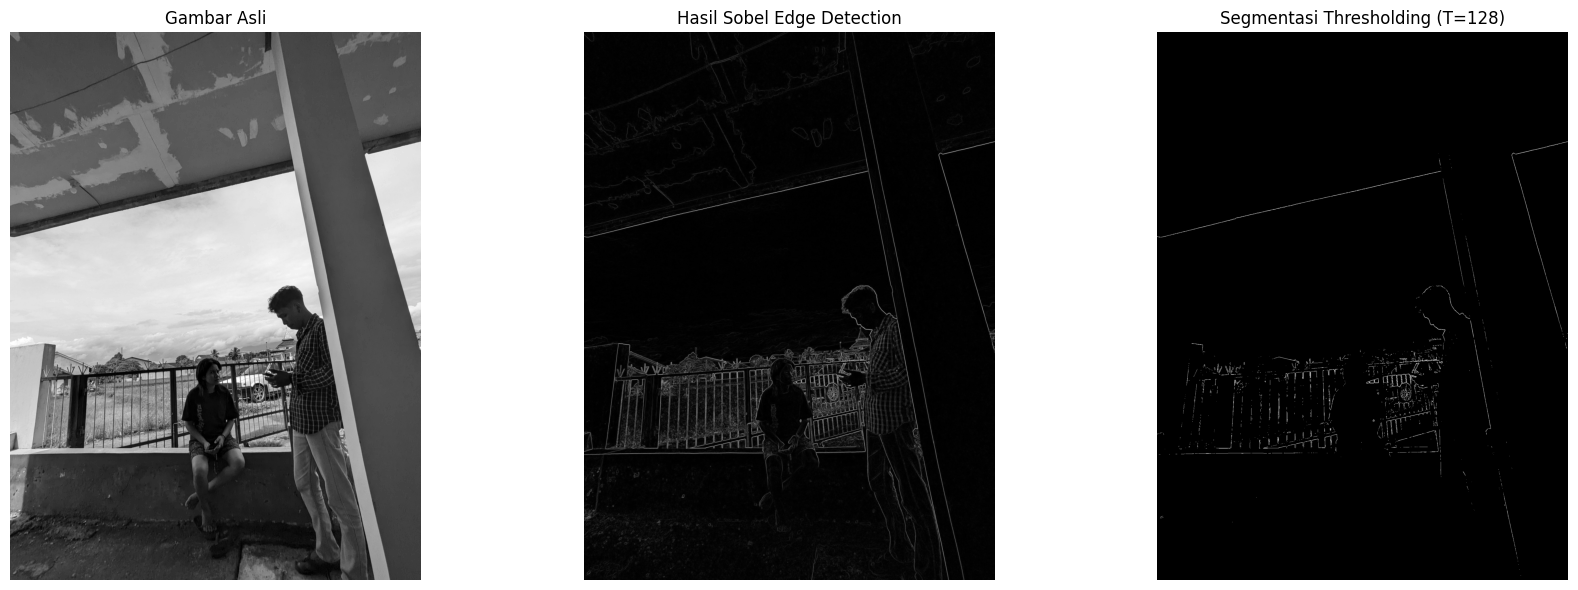

Total piksel pada gambar: 3981312
Total piksel yang tersegmentasi (T=128): 20716
Persentase piksel yang tersegmentasi: 0.52%


In [ ]:

# Import Library
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel
import os

# Fungsi untuk membaca gambar
def load_image(file_path):
    return imageio.imread(file_path, mode='F')

# Fungsi untuk mendeteksi tepi menggunakan Sobel
def sobel_edge_detection(image):
    sobel_x = sobel(image, axis=0)
    sobel_y = sobel(image, axis=1)
    sobel_combined = np.hypot(sobel_x, sobel_y)
    return sobel_combined / np.max(sobel_combined) * 255  # Normalisasi ke skala 0-255

# Fungsi untuk segmentasi dengan thresholding
def basic_thresholding(image, threshold):
    return image > threshold

# Fungsi untuk menyimpan hasil gambar
def save_image(image, file_path):
    # Konversi boolean image ke format uint8 (0 dan 255 untuk penyimpanan)
    image_to_save = (image * 255).astype(np.uint8) if image.dtype == bool else image.astype(np.uint8)
    imageio.imwrite(file_path, image_to_save)
    print(f"Hasil disimpan ke {file_path}")

# Fungsi untuk visualisasi
def visualize_results(original, sobel_edge, segmented, threshold, save_path=None):
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title("Gambar Asli")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Hasil Sobel Edge Detection")
    plt.imshow(sobel_edge, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f"Segmentasi Thresholding (T={threshold})")
    plt.imshow(segmented, cmap='gray')
    plt.axis('off')

    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f"Visualisasi hasil disimpan ke {save_path}")

    plt.tight_layout()
    plt.show()

# Fungsi utama
def main():
    # Path ke gambar input (ganti dengan path yang sesuai)
    image_path = '/content/drive/MyDrive/Colab Notebooks/dataset/image.jpg'

    # Path untuk menyimpan hasil
    output_dir = 'output_images'
    os.makedirs(output_dir, exist_ok=True)  # Buat folder jika belum ada

    # Load gambar
    original_image = load_image(image_path)

    # Deteksi tepi dengan Sobel
    sobel_result = sobel_edge_detection(original_image)

    # Thresholding
    threshold_value = 128
    segmented_image = basic_thresholding(sobel_result, threshold_value)

    # Simpan hasil ke file
    save_image(sobel_result, os.path.join(output_dir, 'sobel_edge_detection.png'))
    save_image(segmented_image, os.path.join(output_dir, 'segmented_image.png'))
    visualize_results(
        original_image,
        sobel_result,
        segmented_image,
        threshold_value,
        save_path=os.path.join(output_dir, 'visualization.png')
    )

    # Analisa hasil
    total_pixels = segmented_image.size
    segmented_pixels = np.sum(segmented_image)
    print(f"Total piksel pada gambar: {total_pixels}")
    print(f"Total piksel yang tersegmentasi (T={threshold_value}): {segmented_pixels}")
    print(f"Persentase piksel yang tersegmentasi: {segmented_pixels / total_pixels * 100:.2f}%")

# Jalankan program
if __name__ == "__main__":
    main()